# Dataset

DOI 10.24432/C51307

Este estudio examinó la evaluación de los requisitos de carga de calefacción de los edificios (es decir, eficiencia energética) en función de los parámetros del edificio.

Realizamos análisis energéticos utilizando 12 formas de edificios diferentes simuladas en Ecotect. Los edificios se diferencian en cuanto a la superficie acristalada, la distribución del área acristalada y la orientación, entre otros parámetros. Simulamos varios escenarios en función de las características antes mencionadas para obtener 768 formas de edificios. El conjunto de datos comprende 768 muestras y 8 características, con el objetivo de predecir dos respuestas con valor real. También se puede utilizar como un problema de clasificación de clases múltiples si la respuesta se redondea al entero más cercano.

Específicamente:

Compacidad relativa X1

Área de superficie X2

Área de pared X3

Área del techo X4

Altura total X5

Orientación X6

Área de acristalamiento X7

Distribución del área de acristalamiento X8

y1 Carga de calefacción

# Librerías

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns # librería para gráficos estadisticos mas especializados
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split #División del dataset
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score #Métricas
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# For facets
from IPython.display import display, HTML
import base64
!pip install facets-overview==1.1.1
from facets_overview.feature_statistics_generator import FeatureStatisticsGenerator

#What if-tools
!pip install witwidget
from witwidget.notebook.visualization import WitWidget, WitConfigBuilder

# Adquisión de Dataset

In [64]:
url = "https://github.com/Fontalvo389/Machine_Learning_LinearRegression_OLS_and_GradientDescent_EnergyEfficiency_/raw/main/ENB2012_data.xlsx"
dataset = pd.read_excel(url, engine='openpyxl')

# Análisis Exploratorio de Datos

In [65]:
fsg = FeatureStatisticsGenerator()                             #Estadisiticas y resumen de datos
dataframes=[{'table': dataset, 'name': 'trainData'}]
buildingPrototype = fsg.ProtoFromDataFrames(dataframes)        #Generación de prototipo del conjunto de datos
protostr = base64.b64encode(buildingPrototype.SerializeToString()).decode("utf-8")
HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-overview id="elem"></facets-overview>
        <script>
          var data = "{protostr}";
          document.querySelector("#elem").protoInput = data;
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

# Diseño del modelo de aprendizaje automático

In [66]:
#Limpieza de datos
dataset=dataset.dropna(how="any", axis=0)
dataset.shape

#Entrada y salida
x_data=np.column_stack((dataset["X1"], dataset["X2"], dataset["X4"], dataset["X5"], dataset["X7"]))
y_data= dataset["Y1"]
x_data.shape, y_data.shape

((768, 5), (768,))

Se normaliza en maximos y minimos

In [67]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x_data)
x_scaled.shape, x_scaled

((768, 5),
 array([[1., 0., 0., 1., 0.],
        [1., 0., 0., 1., 0.],
        [1., 0., 0., 1., 0.],
        ...,
        [0., 1., 1., 0., 1.],
        [0., 1., 1., 0., 1.],
        [0., 1., 1., 0., 1.]]))

División del Dataset

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_data, test_size=0.3, random_state=40)
x_train.shape, x_test.shape, y_test.shape, y_train.shape

((537, 5), (231, 5), (231,), (537,))

Modelo

# Regresión Lineal: OLS

Gráfico de parametros selecionados

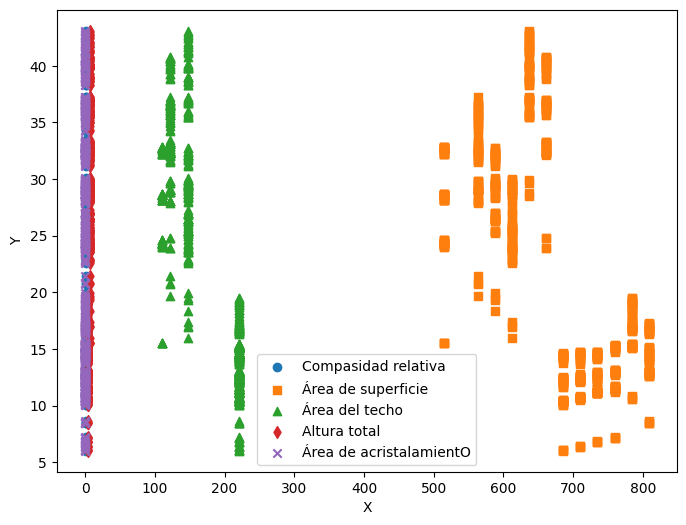

In [69]:
columnas_a_trazar = [('X1', 'Compasidad relativa'), ('X2', 'Área de superficie'), ('X4', 'Área del techo'),
 ('X5', 'Altura total'), ('X7','Área de acristalamientO')]
# Estilo de marcadores y colores para cada conjunto de datos
estilo = ['o', 's', '^', 'd', 'x']
colores = ['blue', 'green', 'red', 'purple', 'orange']

plt.figure(figsize=(8, 6))

for columna, etiqueta in columnas_a_trazar:
    plt.scatter(dataset[columna], y_data, label=etiqueta, marker=estilo.pop(0))

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

Definción del regresor

In [70]:
x_reg=np.ones_like(x_data)
x_reg

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       ...,
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

Concatenación vertical

In [71]:
x_reg=np.c_[x_reg,x_data]
x_reg, x_reg.shape

(array([[  1.  ,   1.  ,   1.  , ..., 110.25,   7.  ,   0.  ],
        [  1.  ,   1.  ,   1.  , ..., 110.25,   7.  ,   0.  ],
        [  1.  ,   1.  ,   1.  , ..., 110.25,   7.  ,   0.  ],
        ...,
        [  1.  ,   1.  ,   1.  , ..., 220.5 ,   3.5 ,   0.4 ],
        [  1.  ,   1.  ,   1.  , ..., 220.5 ,   3.5 ,   0.4 ],
        [  1.  ,   1.  ,   1.  , ..., 220.5 ,   3.5 ,   0.4 ]]),
 (768, 10))

In [72]:
modelo = LinearRegression()
modelo.fit(x_train, y_train)

LinearRegression()

Prueba de modelo

In [73]:
y_data=dataset['Y1']
x_data=dataset[['X1', 'X2', 'X4', 'X5', 'X7']]
y_data.shape, x_data.shape

((768,), (768, 5))

Agrego sesgos

In [74]:
# Agrego sesgo
x_data_reg = np.c_[np.ones_like(y_data), x_data]
x_data_reg.shape

(768, 6)

Ecuación OLS

In [75]:
#theta(0) es el sesgo
theta = np.dot(np.dot(np.linalg.inv(np.dot(x_data_reg.T, x_data_reg)), x_data_reg.T), y_data)
theta

array([ 8.43864711e+01, -6.47734319e+01, -2.64761432e-02, -1.21626451e-01,
        4.16995371e+00,  2.04379683e+01])

Predicción del modelo

In [76]:
y_pred = np.dot(x_data_reg, theta)
y_pred.shape

(768,)

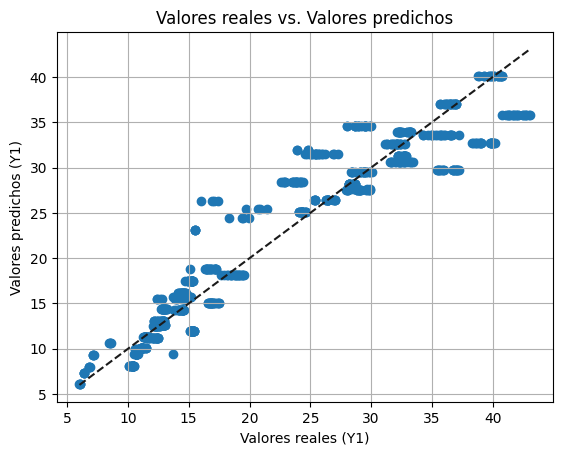

In [77]:
fig, ax = plt.subplots()
ax.scatter(y_data, y_pred)

ax.set_xlabel('Valores reales (Y1)')
ax.set_ylabel('Valores predichos (Y1)')
ax.set_title('Valores reales vs. Valores predichos')
ax.plot([min(y_data), max(y_data)], [min(y_data), max(y_data)], ls="--", c=".1")

plt.grid(True)
plt.show()

# Métricas OLS

**MSE**

In [78]:
#MSE de entrenamiento
y_train_pred=modelo.predict(x_train)
mse_train=mean_squared_error(y_train, y_train_pred)
print("MSE de entrenamiento =", mse_train)

# MSE de prueba
y_pred = modelo.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred)
print("MSE de prueba =", mse_test)

MSE de entrenamiento = 8.428374658017942
MSE de prueba = 9.122853118041256


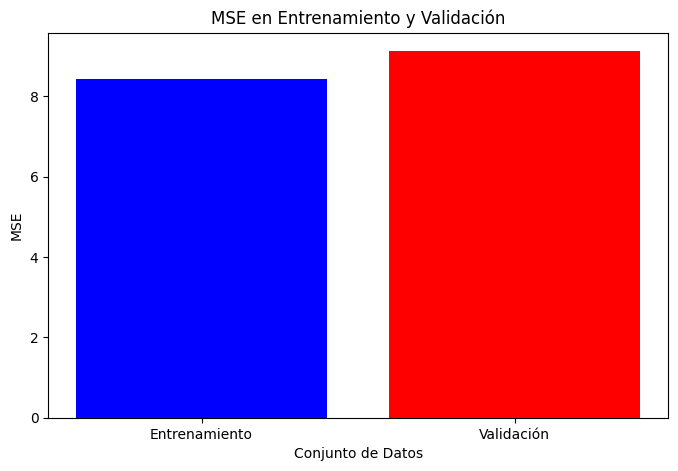

In [79]:
labels = ['Entrenamiento', 'Validación']
# Valores de MSE correspondientes
mse_values = [mse_train, mse_test]

# Crear un gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(labels, mse_values, color=['blue', 'red'])
plt.xlabel('Conjunto de Datos')
plt.ylabel('MSE')
plt.title('MSE en Entrenamiento y Validación')
plt.show()

**RMSE**

In [80]:
#RMSE entrenamiento
rmse_train = np.sqrt(mse_train)
print("RMSE entrenamiento =", rmse_train)

#RMSE validación
rmse_test = np.sqrt(mse_test)
print("RMSE validación =", rmse_test)

RMSE entrenamiento = 2.9031663159416037
RMSE validación = 3.0204061180644657


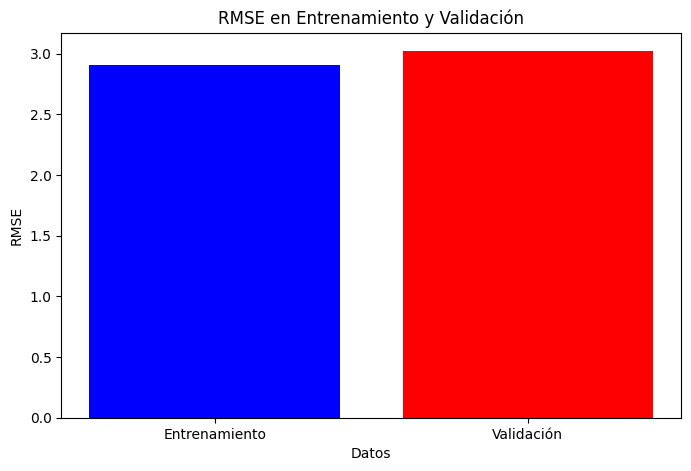

In [81]:
labels = ['Entrenamiento', 'Validación']
rmse_values = [rmse_train, rmse_test]

plt.figure(figsize=(8, 5))
plt.bar(labels, rmse_values, color=['blue', 'red'])
plt.xlabel('Datos')
plt.ylabel('RMSE')
plt.title('RMSE en Entrenamiento y Validación')
plt.show()

**R2**

In [82]:
#R2
r_squared_train = r2_score(y_train, y_train_pred)
print("R^2 en entrenamiento =", r_squared_train)

r_squared_test = r2_score(y_test, y_test)
print("R^2 de validación =", r_squared_test)

R^2 en entrenamiento = 0.9189801442736288
R^2 de validación = 1.0


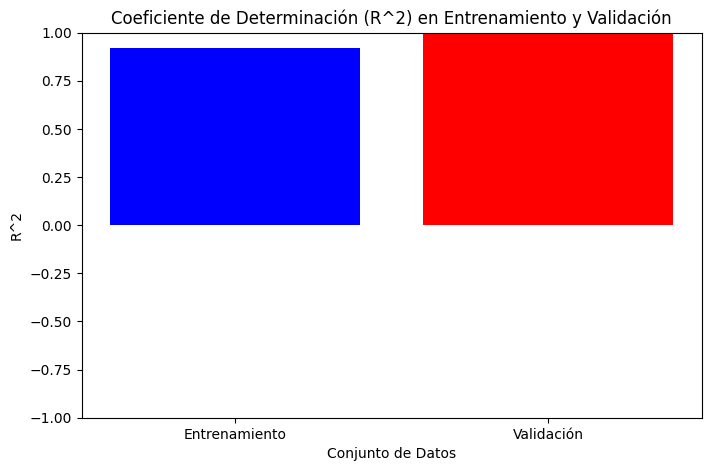

In [83]:
labels = ['Entrenamiento', 'Validación']
r2_values = [r_squared_train, r_squared_test]

plt.figure(figsize=(8, 5))
plt.bar(labels, r2_values, color=['blue', 'red'])
plt.xlabel('Conjunto de Datos')
plt.ylabel('R^2')
plt.title('Coeficiente de Determinación (R^2) en Entrenamiento y Validación')
plt.ylim([-1, 1])
plt.show()

**MAE**

In [84]:
mae_train = mean_absolute_error(y_train, y_train_pred)
print("MAE de entrenamiento =", mae_train)

y_pred = modelo.predict(x_test)

mae_test = mean_absolute_error(y_test, y_pred)
print("MAE de validación =", mae_test)

MAE de entrenamiento = 2.0572947530938923
MAE de validación = 2.076508334074537


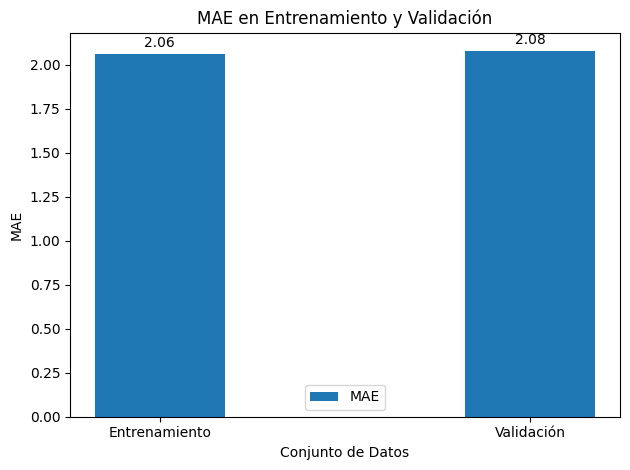

In [85]:
# Crear una figura y ejes
fig, ax = plt.subplots()

# Etiquetas para las barras
labels = ['Entrenamiento', 'Validación']

# Valores de MAE
mae_values = [mae_train, mae_test]

# Posiciones de las barras
x = np.arange(len(labels))

# Ancho de las barras
width = 0.35

# Crear barras
rects = ax.bar(x, mae_values, width, label='MAE')

# Configurar etiquetas, título y leyenda
ax.set_xlabel('Conjunto de Datos')
ax.set_ylabel('MAE')
ax.set_title('MAE en Entrenamiento y Validación')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Agregar etiquetas con los valores de MAE
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # Desplazamiento vertical de la etiqueta
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar la gráfica
plt.tight_layout()
plt.show()